# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [8]:
colors_lego = pd.read_csv("./data/colors.csv")
sets_lego = pd.read_csv("./data/sets.csv")
themes_lego = pd.read_csv("./data/themes.csv")

In [9]:
colors_lego.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [10]:
print(f"There are {colors_lego['name'].nunique()} unique colors that LEGO produces.")

There are 135 unique colors that LEGO produces.


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [11]:
transparent = len(colors_lego[colors_lego["is_trans"] == 't'])
not_transparent = len(colors_lego[colors_lego["is_trans"] == 'f'])
print(f"LEGO has {transparent} transparent colors and {not_transparent} opaque colors.")

LEGO has 28 transparent colors and 107 opaque colors.


<b>Alternative methods of finding transparent and opaque color offerings of LEGO</b>

In [12]:
colors_lego["is_trans"].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [13]:
colors_lego.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

 <img src = "https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src =  "https://i.imgur.com/whB1olq.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [14]:
sets_lego.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [15]:
sets_lego.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [16]:
start_year = sets_lego["year"].min()
first_set = sets_lego[sets_lego["year"] == start_year]
first_set

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


The first LEGO sets were made in 1949 and they were called ABB or <i>'Automatic Binding Brick'</i> sets.

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [17]:
len(first_set)

5

LEGO sold 5 sets in their first year. These were usually gift or brick sets.

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [18]:
sets_lego.sort_values("num_parts", ascending= False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [19]:
sets_per_year = sets_lego.groupby("year").count()
sets_per_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [20]:
sets_comparision = sets_per_year.loc[[1955, 2019]]
sets_comparision

,set_num,name,theme_id,num_parts
year,,,,
1955,28,28,28,28
2019,840,840,840,840


There were 28 sets released in 1955 and there were 840 sets released in 2019. That's 30 times more sets released in 2019 as compared to 1955!

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

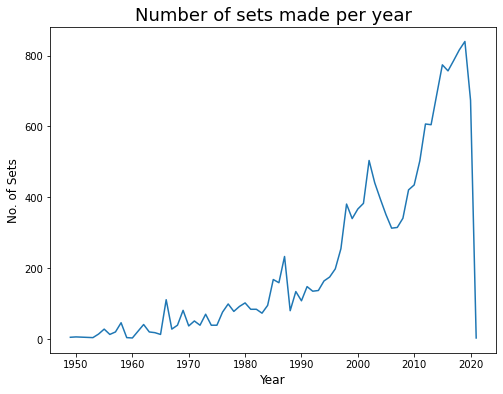

In [21]:
plt.figure(figsize=(8,6))
plt.plot(sets_per_year.index, sets_per_year["set_num"])
plt.title("Number of sets made per year", fontsize = 18)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("No. of Sets", fontsize = 12)
plt.show()

The number of sets have seen a rise and fall across some years but have generally increased with the years. The number suddenly drops at 2021 because the data is from late 2020.

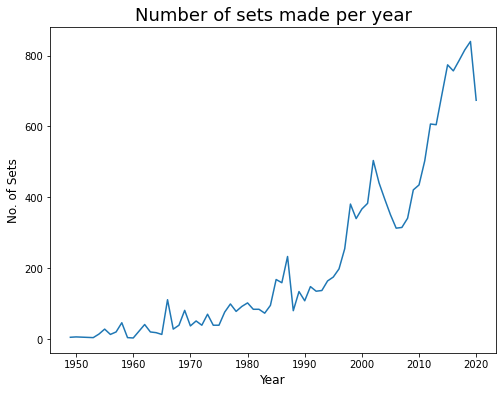

In [22]:
plt.figure(figsize=(8,6))
plt.plot(sets_per_year.index[:-1], sets_per_year["set_num"].iloc[:-1])
plt.title("Number of sets made per year", fontsize = 18)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("No. of Sets", fontsize = 12)
plt.show()

This is the graph for number of sets made per year but removing 2021, considering it was an outlier.

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [23]:
theme_by_year = sets_lego.groupby("year")["theme_id"].nunique()
theme_by_year.tail()

year
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

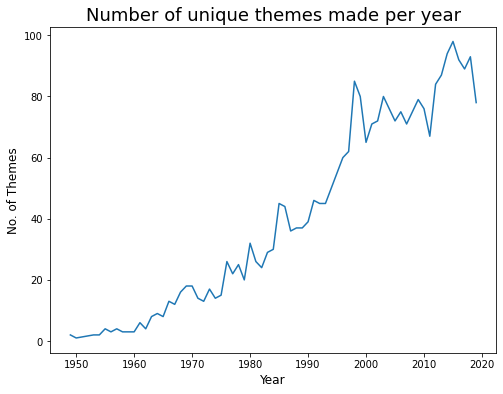

In [24]:
plt.figure(figsize=(8,6))
plt.plot(theme_by_year.index[:-2], theme_by_year.values[:-2])
plt.title("Number of unique themes made per year", fontsize = 18)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("No. of Themes", fontsize = 12)
plt.show()

This graph shows the number of unique themes shipped each year. Since the number of sets made incrreased as years progressed, so did the number of different themes.

### Line Charts with Two Seperate Axes

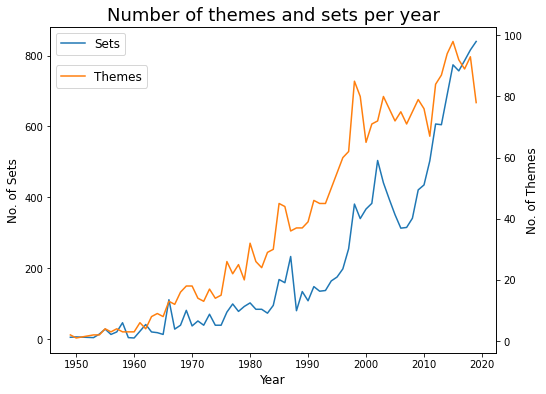

In [40]:
plt.figure(figsize=(8,6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_per_year.index[:-2], sets_per_year["set_num"].iloc[:-2], label = "Sets", color = "#1f77b4")
ax2.plot(theme_by_year.index[:-2], theme_by_year.values[:-2], label = "Themes", color = "#ff7f0e")
ax1.set_title("Number of themes and sets per year", fontsize = 18)
ax1.set_xlabel("Year", fontsize = 12)
ax1.set_ylabel("No. of Sets", fontsize = 12)
ax2.set_ylabel("No. of Themes", fontsize = 12)
ax1.legend(loc = 'upper left', fontsize = 12, bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc = 'upper left', fontsize = 12, bbox_to_anchor=(0.0, 0.9))
plt.show()


Looking at the trend we can see that each year the number of unique themes LEGO offers increases and so do the number of sets LEGO produces. We can see similar peaks and dips, suggesting that the year new themes increase, there is a spike in number of sets produced too. 

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [26]:
avg_parts_per_year = sets_lego.groupby("year")["num_parts"].agg("mean")
avg_parts_per_year

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
           ...    
2017    221.840967
2018    213.618873
2019    207.510714
2020    259.732938
2021      0.000000
Name: num_parts, Length: 71, dtype: float64

In [27]:
year_comparision = avg_parts_per_year.loc[[1954, 2017]]
year_comparision

year
1954     12.357143
2017    221.840967
Name: num_parts, dtype: float64

The number of parts averaged across all sets was 12 parts per set in 1954, and 222 in 2017. This shows that LEGO started making more complicated sets as the years went on.

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

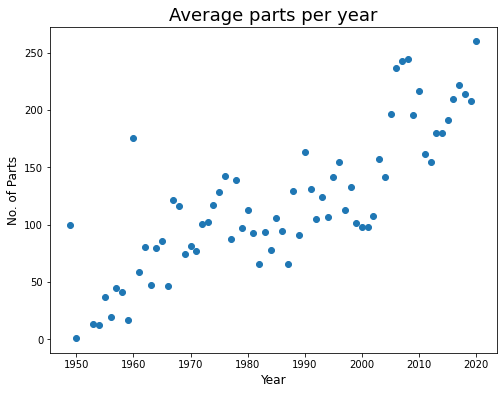

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(avg_parts_per_year.index[:-1], avg_parts_per_year.values[:-1])
plt.title("Average parts per year", fontsize = 18)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("No. of Parts", fontsize = 12)
plt.show()

The complexity of LEGO sets increased significantly over the years.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [42]:
sets_by_themes = sets_lego["theme_id"].value_counts()
sets_by_themes

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src =  "https://i.imgur.com/Sg4lcjx.png"> 

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [43]:
themes_lego.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [44]:
themes_lego[themes_lego["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [50]:
print(sets_lego[sets_lego["theme_id"] == 18].head())
print(sets_lego[sets_lego["theme_id"] == 158].head())
print(sets_lego[sets_lego["theme_id"] == 209].head())
print(sets_lego[sets_lego["theme_id"] == 261].head())

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
      set_num                                               name  year  \
850   11912-1                Star Wars: Build Your Own Adventure  2016   
855   11920-1  Parts for Star Wars Build Your Own Adventure: ...  2019   
1717  20006-1                            Clone Turbo Tank - Mini  2008   
1728  20007-1                     Republic Attack Cruiser - Mini  2009   
1738  20009-1                                AT-TE Walker - Mini  2009   

      theme_id  num_parts  
850        158         73  
855        158         70  
171

Set theme 18 were usually sold in early 2000s, set theme 158 were sold in late 2000s to 2010s. Set themes 209 are advent calendars and set theme 261 are developer kits.

### Merging (i.e., Combining) DataFrames based on a Key


In [52]:
sets_per_theme = sets_lego["theme_id"].value_counts()
sets_per_theme

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [53]:
sets_by_themes = pd.DataFrame({'id' : sets_by_themes.index, "set_count" : sets_by_themes.values})
sets_by_themes

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [55]:
sets_and_themes = pd.merge(themes_lego, sets_by_themes, on = 'id').sort_values(by = ["set_count"], ascending=False)
sets_and_themes.head()

,id,name,parent_id,set_count
134,158,Star Wars,NaN,753
384,501,Gear,NaN,656
379,494,Friends,NaN,398
336,435,Ninjago,NaN,356
386,503,Key Chain,501.0,329


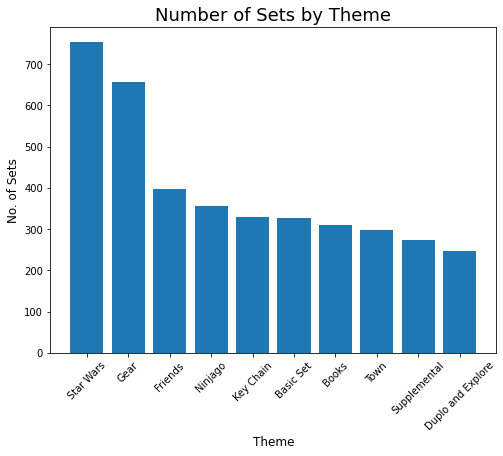

In [59]:
plt.figure(figsize=(8,6))
plt.bar(sets_and_themes.name[:10], sets_by_themes.set_count[:10])
plt.title("Number of Sets by Theme", fontsize = 18)
plt.xlabel("Theme", fontsize = 12)
plt.ylabel("No. of Sets", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

Looking at the data, we can see that Star Wars have the most sets which shows that its the most poular LEGO theme. It's also almost twice as popular as the third most popular LEGO theme, Friends. Gear themed sets are a close second, also being significantly more popular than other themes. Key chains and books are also fairly popular despite not being LEGO sets. 